# **Literature using NN**

### **I've created the dataset having Taylor Swift's song lyrics from genius.com**

In [ ]:
# https://drive.google.com/file/d/16cTo8wgoNmzC7gxxJNYQZTceEfGoaMFu/view?usp=sharing

!pip install wget

import wget
url = "https://drive.google.com/uc?export=download&id=16cTo8wgoNmzC7gxxJNYQZTceEfGoaMFu"
wget.download(url, "/tmp/TaylorS.txt")

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=b87ca914a120cfdbc5904820ba6cb3e82945b4aa619f92fc6d8a23f5c8c0d981
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


'/tmp/TaylorS.txt'

## **Let's Pre-process the data**

In [ ]:
punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
clean_poem = ""

whole_poem = [line for line in open("/tmp/TaylorS.txt", 'r')]
for i in range(len(whole_poem)):
  for char in whole_poem[i]:
    if char not in punctuations:
      clean_poem = clean_poem + char

corpus = clean_poem.lower().split("\n")
corpus

['you were in college working parttime waiting tables',
 'left a small town and never looked back',
 'i was a flight risk with a fear of falling',
 'wondering why we bother with love if it never lasts',
 'i say can you believe it',
 'as were lying on the couch',
 'the moment i could see it',
 'yes yes i can see it now',
 'do you remember we were sitting there by the water',
 'you put your arm around me for the first time',
 'you made a rebel of a careless mans careful daughter',
 'you are the best thing thats ever been mine',
 'flash forward and were taking on the world together',
 'and theres a drawer of my things at your place',
 'you learn my secrets and figure out why im guarded',
 'you say well never make my parents mistakes',
 'but we got bills to pay',
 'we got nothing figured out',
 'when it was hard to take',
 'yes yes',
 'this is what i thought about',
 'do you remember we were sitting there by the water',
 'you put your arm around me for the first time',
 'you made a rebel o

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

token = Tokenizer()
token.fit_on_texts(corpus)
total_words = len(token.word_index) + 1

print(token.word_index)
print(total_words)


{'you': 1, 'the': 2, 'i': 3, 'and': 4, 'to': 5, 'a': 6, 'it': 7, 'of': 8, 'me': 9, 'were': 10, 'back': 11, 'now': 12, 'your': 13, 'im': 14, 'is': 15, 'in': 16, 'time': 17, 'my': 18, 'all': 19, 'id': 20, 'but': 21, 'like': 22, 'know': 23, 'we': 24, 'when': 25, 'go': 26, 'on': 27, 'december': 28, 'this': 29, 'what': 30, 'so': 31, 'say': 32, 'see': 33, 'for': 34, 'ever': 35, 'mine': 36, 'out': 37, 'yeah': 38, 'killing': 39, 'been': 40, 'that': 41, 'story': 42, 'us': 43, 'never': 44, 'was': 45, 'around': 46, 'best': 47, 'thats': 48, 'dont': 49, 'standing': 50, 'love': 51, 'can': 52, 'remember': 53, 'first': 54, 'made': 55, 'careless': 56, 'mans': 57, 'careful': 58, 'daughter': 59, 'are': 60, 'thing': 61, 'make': 62, 'nothing': 63, 'how': 64, 'its': 65, 'turn': 66, 'down': 67, 'mind': 68, 'why': 69, 'if': 70, 'yes': 71, 'do': 72, 'by': 73, 'water': 74, 'rebel': 75, 'saw': 76, 'alone': 77, 'hold': 78, 'tell': 79, 'room': 80, 'up': 81, 'not': 82, 'speaking': 83, 'dying': 84, 'since': 85, 'twi

In [ ]:
input_seq = []
for line in corpus:
  sequence = token.texts_to_sequences([line])[0]
  for i in range(1, len(sequence)):
    input_seq.append(sequence[:i+1])

print("Sequence without padding:\n", input_seq[0:5])

Sequence without padding:
 [[1, 10], [1, 10, 16], [1, 10, 16, 162], [1, 10, 16, 162, 163], [1, 10, 16, 162, 163, 164]]


In [ ]:
import numpy as np
max_seq_len = max([len(j) for j in input_seq])
padded_input_seq = np.array(pad_sequences(input_seq,  maxlen = max_seq_len, padding = "pre"))
print("Sequence without padding:\n", padded_input_seq[0:5])

Sequence without padding:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   1  10]
 [  0   0   0   0   0   0   0   0   0   0   0   1  10  16]
 [  0   0   0   0   0   0   0   0   0   0   1  10  16 162]
 [  0   0   0   0   0   0   0   0   0   1  10  16 162 163]
 [  0   0   0   0   0   0   0   0   1  10  16 162 163 164]]


### **Just for Verification**

In [ ]:
tmp = padded_input_seq[0:3]
print(tmp)
print(tmp[:,-1])
print(tmp[:,:-1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   1  10]
 [  0   0   0   0   0   0   0   0   0   0   0   1  10  16]
 [  0   0   0   0   0   0   0   0   0   0   1  10  16 162]]
[ 10  16 162]
[[ 0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  1 10]
 [ 0  0  0  0  0  0  0  0  0  0  1 10 16]]


### **End of Verification**

## **Creating the Model**

In [ ]:
xs, labels = padded_input_seq[:,:-1], padded_input_seq[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

print("Checking the Input:\n", xs[0])
print("Checking the Output label:\n", ys[0])

model = tf.keras.Sequential([
             tf.keras.layers.Embedding(total_words, 64, input_length = max_seq_len - 1), # As cropping the last num for label
             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
             tf.keras.layers.Dense(64, activation = "relu"),
             tf.keras.layers.Dropout(0.2),
             tf.keras.layers.Dense(total_words, activation = "softmax")
])                                   
             
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(xs, ys, epochs=500, verbose=1)             

Checking the Input:
 [0 0 0 0 0 0 0 0 0 0 0 0 1]
Checking the Output label:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [ ]:
my_text = str(input("Enter Sentence of my choice:\n"))
next_words = int(input("Length of words I want:\n"))

for _ in range(next_words):
	token_list = token.texts_to_sequences([my_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
 #	predicted = model.predict_classes(token_list, verbose=0)
	predicted = np.argmax(model.predict(token_list), axis = -1)

	output_word = ""
	for word, index in token.word_index.items():
		if index == predicted:
			output_word = word
			break
	my_text += " " + output_word
print(my_text)

Enter Sentence of my choice:
kiss me goodbye
Length of words I want:
20
kiss me goodbye up and i swear id love you right out missing of fate when it all broke down down than ever


## **Creating a different model (Using GRU)**

In [ ]:
from tensorflow.keras.optimizers import Adam

xs, labels = padded_input_seq[:,:-1], padded_input_seq[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

print("Checking the Input:\n", xs[0])
print("Checking the Output label:\n", ys[0])

model2 = tf.keras.Sequential([
             tf.keras.layers.Embedding(total_words, 120, input_length = max_seq_len - 1), # As cropping the last num for label
             tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128)),
             tf.keras.layers.Dense(128, activation = "relu"),
             tf.keras.layers.Dropout(0.3),
             tf.keras.layers.Dense(total_words, activation = "softmax")
])                                   
             
model2.compile(optimizer = Adam(beta_1=0.9, beta_2=0.999, epsilon=1e-05), 
              loss = "categorical_crossentropy", 
              metrics = ["accuracy"])
  
model2.summary()


early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='loss', patience=70, verbose = 1, restore_best_weights=True)
  
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='accuracy', factor=0.2, patience=50, verbose = 1,
    min_delta=0.01)

history2 = model2.fit(xs, ys, epochs=300, callbacks = [early_stop, reduce_lr], verbose = 1)

print("Training Done....!!!!")             

Checking the Input:
 [0 0 0 0 0 0 0 0 0 0 0 0 1]
Checking the Output label:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

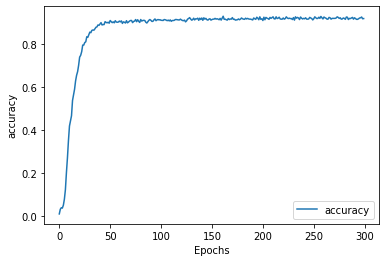

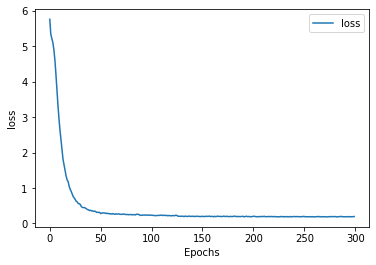

In [ ]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

def plot_graphs(string):
    plt.plot(history2.history[string])
    # plt.plot(history2.history[+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, string])
    plt.show()
  
plot_graphs("accuracy")
plot_graphs("loss")

## **Now, using same model(Upper one), but using LSTM**

In [ ]:
from tensorflow.keras.optimizers import Adam

xs, labels = padded_input_seq[:,:-1], padded_input_seq[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

# print("Checking the Input:\n", xs[0])
# print("Checking the Output label:\n", ys[0])

model3 = tf.keras.Sequential([
             tf.keras.layers.Embedding(total_words, 120, input_length = max_seq_len - 1), # As cropping the last num for label
             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
             tf.keras.layers.Dense(128, activation = "relu"),
             tf.keras.layers.Dropout(0.3),
             tf.keras.layers.Dense(total_words, activation = "softmax")
])                                   
             
model3.compile(optimizer = Adam(beta_1=0.9, beta_2=0.999, epsilon=1e-05), 
              loss = "categorical_crossentropy", 
              metrics = ["accuracy"])
  
model3.summary()


early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='loss', patience=70, verbose = 1, restore_best_weights=True)
  
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='accuracy', factor=0.2, patience=50, verbose = 1,
    min_delta=0.01)

history3 = model3.fit(xs, ys, epochs=300, callbacks = [early_stop, reduce_lr], verbose = 1)

print("Training Done....!!!!")             

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 13, 120)           40680     
_________________________________________________________________
bidirectional_7 (Bidirection (None, 256)               254976    
_________________________________________________________________
dense_14 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 339)               43731     
Total params: 372,283
Trainable params: 372,283
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
35/35 [==============================] - 0s 8ms/step - loss: 5.7533 - accuracy: 0.0216
Epoch 2/300
35/

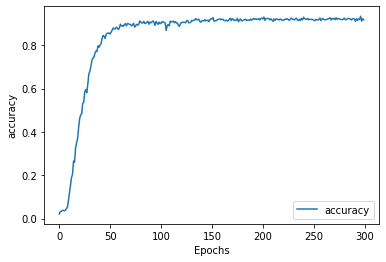

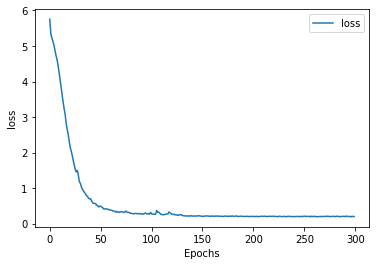

In [ ]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

def plot_graphs(string):
    plt.plot(history3.history[string])
    # plt.plot(history2.history[+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, string])
    plt.show()
  
plot_graphs("accuracy")
plot_graphs("loss")

## **Prediction / Text Generation using GRU**

In [ ]:
my_text = str(input("Enter Sentence of my choice:\n"))
next_words = int(input("Length of words I want:\n"))

for _ in range(next_words):
	token_list = token.texts_to_sequences([my_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
 #	predicted = model.predict_classes(token_list, verbose=0)
	predicted = np.argmax(model2.predict(token_list), axis = -1)

	output_word = ""
	for word, index in token.word_index.items():
		if index == predicted:
			output_word = word
			break
	my_text += " " + output_word
print(my_text)

Enter Sentence of my choice:
Neeti and I
Length of words I want:
15
Neeti and I remember that fight 230 am am care less there to die turn around and change


## **Prediction / Text Generation using LSTM**

In [ ]:
my_text = str(input("Enter Sentence of my choice:\n"))
next_words = int(input("Length of words I want:\n"))

for _ in range(next_words):
	token_list = token.texts_to_sequences([my_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
 #	predicted = model.predict_classes(token_list, verbose=0)
	predicted = np.argmax(model3.predict(token_list), axis = -1)

	output_word = ""
	for word, index in token.word_index.items():
		if index == predicted:
			output_word = word
			break
	my_text += " " + output_word
print(my_text)

Enter Sentence of my choice:
Neeti and I
Length of words I want:
15
Neeti and I remember that fight 230 am am break next to see me time i didnt call


## **Model - 4**

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 13, 100)           33900     
_________________________________________________________________
bidirectional_9 (Bidirection (None, 13, 300)           301200    
_________________________________________________________________
dropout_9 (Dropout)          (None, 13, 300)           0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_16 (Dense)             (None, 169)               17069     
_________________________________________________________________
dropout_10 (Dropout)         (None, 169)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 339)              

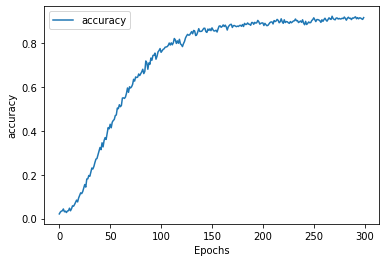

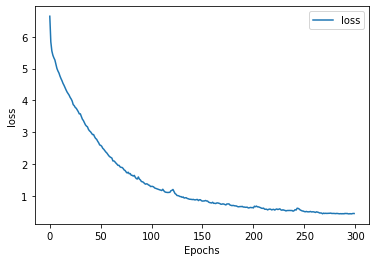

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

xs, labels = padded_input_seq[:,:-1], padded_input_seq[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)


model4 = tf.keras.Sequential([
             tf.keras.layers.Embedding(total_words, 100, input_length = max_seq_len - 1), # As cropping the last num for label
             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150, return_sequences = True)),
             tf.keras.layers.Dropout(0.2),
             tf.keras.layers.LSTM(100),
             tf.keras.layers.Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
             tf.keras.layers.Dropout(0.3),
             tf.keras.layers.Dense(total_words, activation = "softmax")
])                                   
             
model4.compile(optimizer = Adam(beta_1=0.9, beta_2=0.999, epsilon=1e-05), 
              loss = "categorical_crossentropy", 
              metrics = ["accuracy"])
  
model4.summary()


early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='loss', patience=70, verbose = 1, restore_best_weights=True)
  
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='accuracy', factor=0.2, patience=50, verbose = 1,
    min_delta=0.01)

history4 = model4.fit(xs, ys, epochs=300, callbacks = [early_stop, reduce_lr], verbose = 1)

print("Training Done....!!!!")  

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

def plot_graphs(string):
    plt.plot(history4.history[string])
    # plt.plot(history2.history[+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, string])
    plt.show()
  
plot_graphs("accuracy")
plot_graphs("loss")

In [ ]:
my_text = str(input("Enter Sentence of my choice:\n"))
next_words = int(input("Length of words I want:\n"))

for _ in range(next_words):
	token_list = token.texts_to_sequences([my_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
 #	predicted = model.predict_classes(token_list, verbose=0)
	predicted = np.argmax(model4.predict(token_list), axis = -1)

	output_word = ""
	for word, index in token.word_index.items():
		if index == predicted:
			output_word = word
			break
	my_text += " " + output_word
print(my_text)

Enter Sentence of my choice:
Neeti and I
Length of words I want:
15
Neeti and I can see it now see it now see it now hold on a been be
